## Get started with predicting house prices

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

## Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
import lzma

with lzma.open('./home_data.csv.xz') as zfile:
    sales = pd.read_csv(zfile)

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


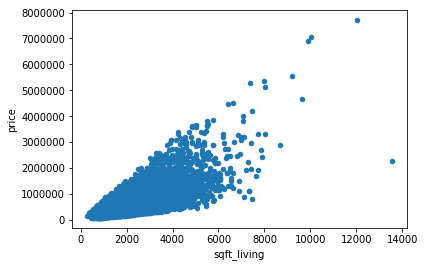

In [5]:
%matplotlib inline
sales.plot(kind='scatter', x='sqft_living', y='price')

## Create a simple regression model of sqft_living to price

Split data into training and testing.
We use seed=0 so that everyone running this notebook gets the same results. In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).

In [7]:
msk = np.random.rand(len(sales)) < 0.8
train = sales[msk]
test = sales[~msk]

## Build the regression model using only sqft_living as a feature

In [14]:
train_x = train['sqft_living'].values
train_y = train['price'].values
train_x = train_x.reshape(len(train_x), 1)
train_y = train_y.reshape(len(train_y), 1)
test_x = test['sqft_living'].values
test_y = test['price'].values
test_x = test_x.reshape(len(test_x), 1)
test_y = test_y.reshape(len(test_y), 1)
regr = linear_model.LinearRegression()
model = regr.fit(train_x, train_y)

## Let's show what out predictions look like

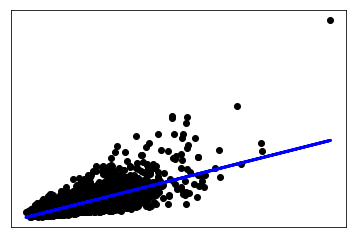

In [15]:
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, regr.predict(test_x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [21]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

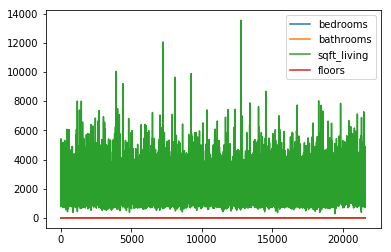

In [22]:
sales[my_features].plot()